In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

In [4]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df



In [5]:
def pre_process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    df = create_dummies(df, ['Age_categories', 'Fare_categories', 'Title', 'Cabin_type', 'Sex'])
    return df

In [6]:
train = pre_process(train)
holdout = pre_process(holdout)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


# Exploring

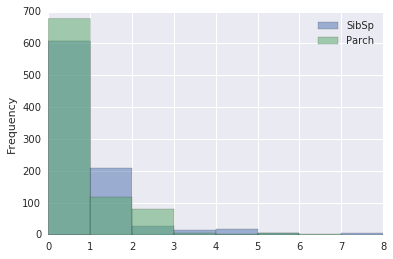

In [8]:
train[['SibSp', 'Parch']].plot.hist(alpha =0.5, bins=8)
plt.show()

In [9]:
train.pivot_table(index='SibSp', values ='Survived')

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [10]:
train.pivot_table(index='Parch', values ='Survived')

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [11]:
train['family_size'] = train['SibSp'] + train['Parch']

In [12]:
train.pivot_table(index='family_size', values='Survived')

family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

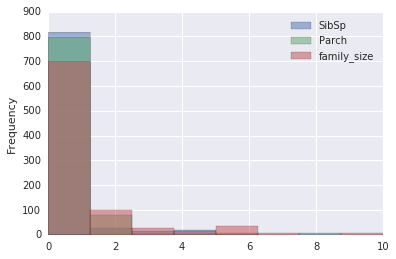

In [13]:
train[['SibSp', 'Parch', 'family_size']].plot.hist(alpha=0.5, bins=8)
plt.show()

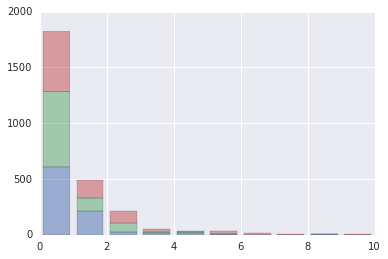

In [14]:
# train[['SibSp', 'Parch', 'family_size']].hist(alpha=0.5, bins=8, stacked=True)
plt.hist([train['SibSp'], train['Parch'], train['family_size']], alpha=0.5, stacked=True)
plt.show()

# Engineering New Features

In [15]:
def create_isalone(df):
    df['family_size'] = df[['SibSp', 'Parch']].sum(axis=1)
    df['isalone'] = df['family_size'] == 0
    df.drop('family_size', axis=1, inplace = True)
    return df

In [16]:
train = create_isalone(train)
holdout = create_isalone(holdout)

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [18]:
def select_features(df):
    df = df.select_dtypes(exclude=['object', 'category'])
    df.dropna(axis=1, inplace=True)
    all_X = df.drop(['PassengerId', 'Survived'], axis=1)
    all_y = df['Survived']
    
    
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10, scoring='accuracy')
    selector.fit(all_X, all_y)
    best_columns = all_X.columns[selector.support_]
#     print(best_columns)
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns
cols = select_features(train)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Best Columns 
------------
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Young Adult',
       'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female',
       'Sex_male', 'isalone'],
      dtype='object')



# Model Selection and Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
def select_model(df, features):
    all_X = df[features]
    all_y = df['Survived']
    
    models = [{
                'name': 'LogisticRegression',
                'estimator': LogisticRegression(),
                'hyperparameters': {
                                    'solver': ['newton-cg', 'lbfgs', 'liblinear']
                                    }
                },
                {
                'name': 'KNeighborsClassifier',
                'estimator': KNeighborsClassifier(),
                'hyperparameters': {
                                    'n_neighbors': range(1,20,2),
                                    'weights': ['distance', 'uniform'],
                                    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                    'p': [1,2]
                                    }
                },
                {
                'name': 'RandomForestClassifier',
                'estimator': RandomForestClassifier(),
                'hyperparameters': {
                                    'n_estimators': [4,6,9],
                                    'criterion': ['entropy', 'gini'],
                                    'max_depth': [2,5,10],
                                    'max_features': ['log2', 'sqrt'],
                                    'min_samples_leaf': [1,5,8],
                                    'min_samples_split': [2,3,5]
                                    }
                }
                ]
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))
        
        gscv = GridSearchCV(model['estimator'], 
                            param_grid=model['hyperparameters'], 
                            cv=10)
        gscv.fit(all_X, all_y)
        
        model['best_params'] = gscv.best_params_
        model['best_score'] = gscv.best_score_
        model['best_model'] = gscv.best_estimator_
                
        print('Best Score: {}'.format(model['best_score']))
        print('Best Parameters: {}\n'.format(model['best_params']))
                
    return models

results = select_model(train, cols)

LogisticRegression
------------------
Best Score: 0.8204264870931538
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.7755331088664422
Best Parameters: {'p': 1, 'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'brute'}

RandomForestClassifier
----------------------
Best Score: 0.8395061728395061
Best Parameters: {'n_estimators': 9, 'max_depth': 10, 'min_samples_split': 3, 'max_features': 'sqrt', 'criterion': 'entropy', 'min_samples_leaf': 1}



# Submission file to Kaggle


In [28]:

results[2]['best_model'].predict[holdout[cols]]
predictions = model.predict(hold)
submission = pd.DataFrame({'PassengerId':holdout['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)


TypeError: 'method' object is not subscriptable